In [61]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = pd.read_csv("howpop_train.csv")
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [63]:
df.shape

(134137, 17)

In [64]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [65]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,      
        inplace = True)

In [66]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/286648/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [67]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [68]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)


object
datetime64[ns]


In [69]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['day'] = [d.day for d in df.published]
df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

## 1. В каком месяце (и какого года) было больше всего публикаций?

In [70]:
df.groupby(["year","month"])["published"].count().idxmax()

(2015, 3)

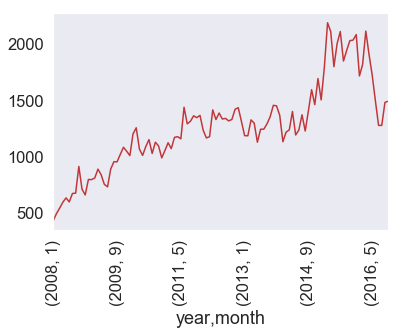

In [71]:
df.groupby(["year","month"])["published"].count().plot(rot=90)
plt.show()

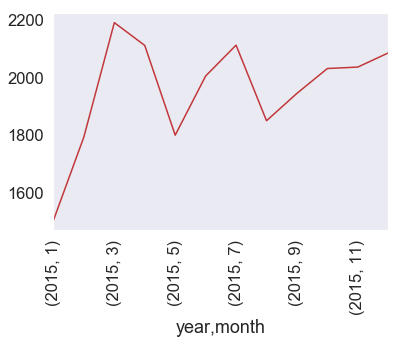

In [72]:
t=df[(df["year"]>=2015) & (df["year"]<2016)]
t["month"].unique()
t.groupby(["year","month"])["published"].count().plot(rot=90)
plt.show()

so, the maximum number of publications was in 2015/03.

## 2. Проанализируйте публикации в месяце из предыдущего вопроса

a) Один или несколько дней сильно выделяются из общей картины.

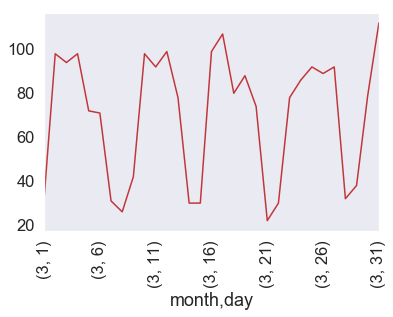

In [73]:
t=df[(df["year"]==2015)&(df["month"]==3)]
t.groupby(["month", "day"])["published"].count().plot(rot=90)

31/03/2015, the biggest value, breaking seasonal behaviour.

b) На хабре всегда больше статей, чем на гиктаймсе

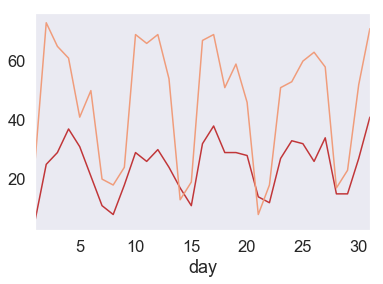

In [74]:
t[t["domain"]=="geektimes.ru"].groupby(["day"])["published"].count().plot()
t[t["domain"]=="habrahabr.ru"].groupby(["day"])["published"].count().plot()
plt.show()

It's true.

c) По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

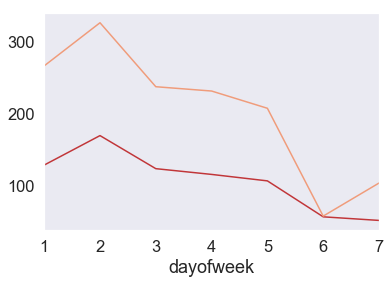

In [75]:
t[t["domain"]=="geektimes.ru"].groupby(["dayofweek"])["published"].count().plot()
t[t["domain"]=="habrahabr.ru"].groupby(["dayofweek"])["published"].count().plot()
plt.show()

It's true.

## 3. Когда лучше всего публиковать статью?

a) Больше всего просмотров набирают статьи, опубликованные в 12 часов дня

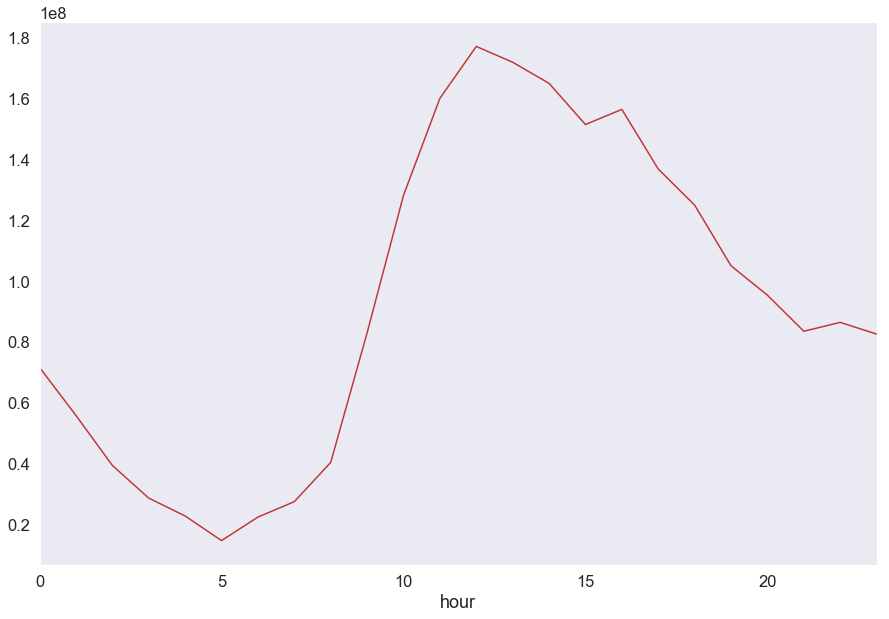

In [79]:
df.groupby(["hour"])["views"].sum().plot(figsize=(15, 10))
plt.show()

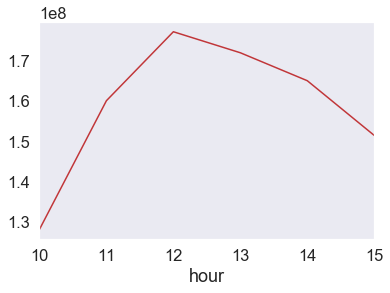

In [80]:
df[(df["hour"]>=10)&(df["hour"]<=15)].groupby(["hour"])["views"].sum().plot()
plt.show()

It's true.

b) У опубликованных в 10 утра постов больше всего комментариев.

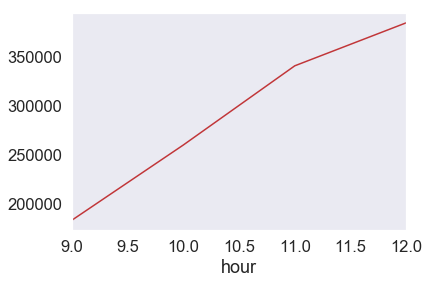

In [86]:
mask = (df["hour"]>=9)&(df["hour"]<=12)
df[mask].groupby(["hour"])["comments"].sum().plot()
plt.show()

It's false.

c) Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера


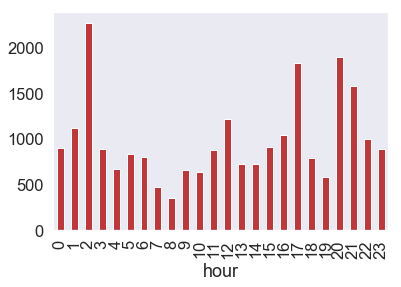

In [28]:
df[df["domain"]=="geektimes.ru"].groupby('hour')['comments'].max().plot(kind='bar')
plt.show()

In [88]:
# g=sns.boxplot(x="hour", y="comments", data=df, palette="Set3")
# g.set_xticklabels(g.get_xticklabels(),rotation=90)

It's false.

d) На хабре дневные статьи комментируют чаще, чем вечерние


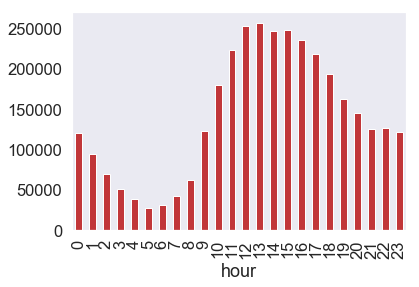

In [94]:
df[df["domain"]=="habrahabr.ru"].groupby(["hour"])["comments"].sum().plot(kind='bar')
plt.show()

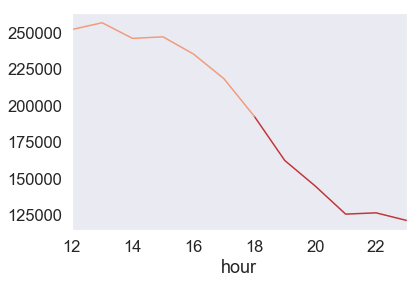

In [95]:
df[(df["domain"]=="habrahabr.ru")&(df["hour"]>=18)&(df["hour"]<=23)].groupby(["hour"])["comments"].sum().plot()
df[(df["domain"]=="habrahabr.ru")&(df["hour"]>=12)&(df["hour"]<=18)].groupby(["hour"])["comments"].sum().plot()
plt.show()

It's true.

## 4. Кого из топ-20 авторов чаще всего минусуют?


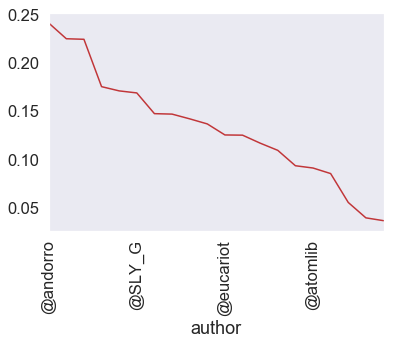

In [101]:
aut=df.groupby("author")["views"].sum().sort_values(ascending=False).index[:20]  # <--- slicing!!!
aut_ind=df["author"].isin(aut)
df["temp"]=df["votes_minus"]/(df["votes_plus"]+df["votes_minus"])
df[aut_ind].groupby("author")["temp"].mean().sort_values(ascending=False).plot(rot=90)
plt.show()

df.drop("temp",axis=1,inplace=True)

@andorro

## 5. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём?

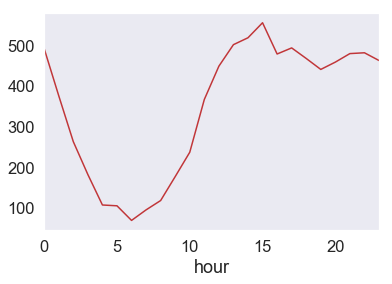

In [103]:
df[df["dayofweek"]==6].groupby(["hour"])["published"].count().plot()
plt.show()

It's true.

Правда ли, что по понедельникам авторы пишут в основном вечером?

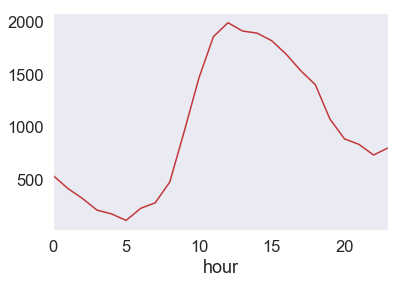

In [104]:
df[df["dayofweek"]==1].groupby(["hour"])["published"].count().plot()
plt.show()

It's false.

In [ ]:
1. Slicing
2. Pandas plotting
3. Pandas stats methods
4. https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html